In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [98]:
#Randomly assign x and y using make classification
X, Y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
#split x and y into train, cv, test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=15, test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, random_state=15, test_size=0.2)

In [101]:
#create SVC modelwith below parameters
clf = SVC(C=100, gamma=0.001)

#fit with train data
clf.fit(x_train, y_train)

#calculate decision function using model attributes
model_df = clf.decision_function(x_cv)

In [102]:
#Own Decision function
def decision_function(x_cv):
  #create numpy zeros array to store decision values for each x_cv 
  a = np.zeros(x_cv.shape[0])
  #iterating through each value in x_cv
  for k in range(len(x_cv)):
    #initialize sum to zero
    sum = 0
    #iterating through each support vectors from model
    for i in range(len(clf.support_vectors_)):
      #calculate sum using formula
      sum += clf.dual_coef_[0][i] * (np.exp((-0.001) * (np.linalg.norm(clf.support_vectors_[i] - x_cv[k]))**2))
    #adding decision values to numpy array
    a[k] = sum + clf.intercept_
  
  #returning array
  return a

In [103]:
#calculate decision function using our own function
fcv = decision_function(x_cv)

In [104]:
print(fcv[:5])
print(model_df[:5])

[ 0.98281259 -1.10424672 -2.02119883 -3.08410483 -2.7867225 ]
[ 0.98281259 -1.10424672 -2.02119883 -3.08410483 -2.7867225 ]


<h1>Task-F</h1>

In [105]:
#initializing weight and intercept to zero
def initialize_weights(dim):
  w = np.zeros_like(dim)
  b = 0
  return w,b

#calculate sigmoid value
def sigmoid(z):
  return (1/(1+np.exp(-z)))

def gradient_dw(x,y,w,b,alpha,N):
  #calculate z value Wt,x + b
  z = np.sum(np.dot(w, x))+b
  #ccalculate gradiant for w using formula
  dw = x*(y - sigmoid(z)) - ((alpha / N) * w)
  return dw

#calculate gradiant for b using formula
def gradient_db(x,y,w,b):
  z=np.sum(np.dot(w, x)) + b
  db = y - sigmoid(z)
  return db

def logloss(y_true, y_pred):
  #convert ytrue and ypred values to numpy array
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  #calculate loss value
  loss = (-1) * ((1/len(y_true)) * (np.sum(y_true*np.log10(y_pred) + ((1-y_true)*np.log10(1-y_pred)))))
  return loss

def pred(w, b, x):
  #pred = [1 if sigmoid((np.dot(w, x[i])) + b) >= 0.5 else 0 for i in range(len(x))]
  pred = sigmoid((np.dot(x, w)) + b)
  return pred

In [106]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos

In [107]:
y_pos = (n_pos + 1)/(n_pos + 2)
y_neg = 1 / (n_neg + 2)

In [108]:
y_cv_mod = np.where(y_cv == 0, y_neg, y_pos)

In [109]:
y_cv_mod.shape, fcv.shape

((800,), (800,))

In [110]:
def train(x_train, y_train, epochs, alpha, eta0):
  #creating empty list train loss, test loss
  global train_loss
  #initialize w, b
  w, b = initialize_weights(x_train[0])
  for i in range(epochs):
    for j in range(len(x_train)):
      #getting gradiant of w and b
      dw = gradient_dw(x_train[j], y_train[j],w,b,alpha,N)
      db = gradient_db(x_train[j], y_train[j], w, b)

      w += (alpha * (dw))
      b += (alpha * (db))
      
    #predict y values for train data
    y_train_pred = pred(w, b, x_train)
    #print(y_train_pred)

    #calculate train loss
    train_l = logloss(y_train, y_train_pred)
    #print(train_l)

    #adding train loss to its list
    train_loss.append(train_l)

    if i != 0:
      if round(train_loss[i], 5) == round(train_loss[i-1], 5):
        print('minimum reached', i)
        break

  return w, b

In [111]:
train_loss = []

alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs=100
w,b=train(fcv,y_cv_mod,epochs,alpha,eta0)

In [112]:
ftest = decision_function(x_test)

In [113]:
print(w, b)

1.4277321726651067 -0.17911142322741322


In [114]:
y_prob = []
for i in range(len(x_test)):
  p = 1 / (1+ np.exp(-1*w*ftest[i] + b))
  y_prob.append(p)

In [115]:
y_prob[:5]

[0.1866095212094272,
 0.9523740312199632,
 0.22337703002356762,
 0.7162743748454865,
 0.0004975341099692886]

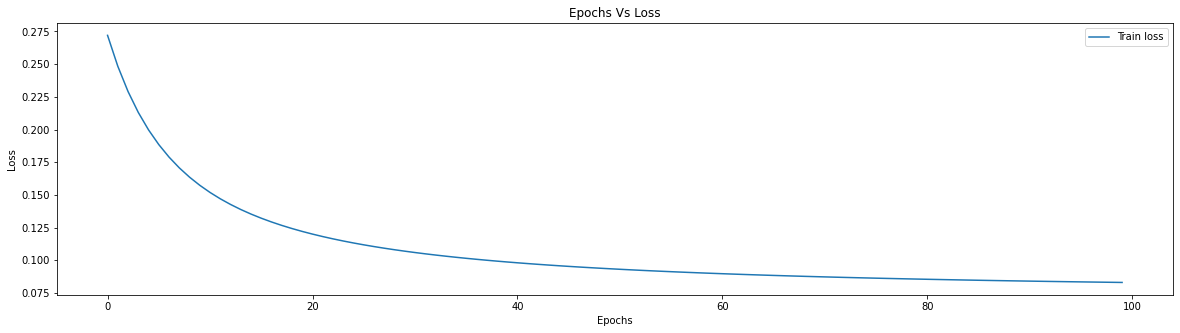

In [116]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(train_loss)), train_loss, label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.legend()
plt.show()